# Implementation of Wu et al Spatio-Temporal Back Propagation.

See README.ipynb for the underlying math.

In [2]:
import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import matplotlib.pyplot as plt
import data_loader
from model import LIF_network, Solver
import time
import pickle

%load_ext autoreload
%autoreload 2

Load MNIST dataset

In [5]:
num_classes = 10
(x_train, y_train),(x_test, y_test) = data_loader.load(path='../dataset')
one_hot_train, one_hot_test = data_loader.one_hot_encode(y_train, y_test, num_classes)

`ber(p)` transforms a grey scale image in `0,1` spikes image. See exemples below.

In [8]:
def ber(p):
    return np.array(np.random.random(p.shape) <= p, np.int)

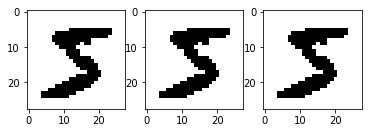

In [8]:
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(ber(x_train[0]).reshape((28,28)), cmap=plt.cm.binary)
plt.show()

Create a model with 10 time steps of exposition. The run it without training on the 3 first training sample. Display the accumulated potential and the accumulated spikes in the output of the network and the transformed image that is fed to it.

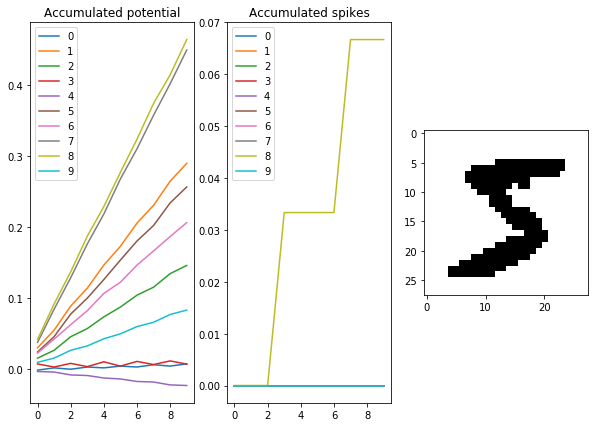

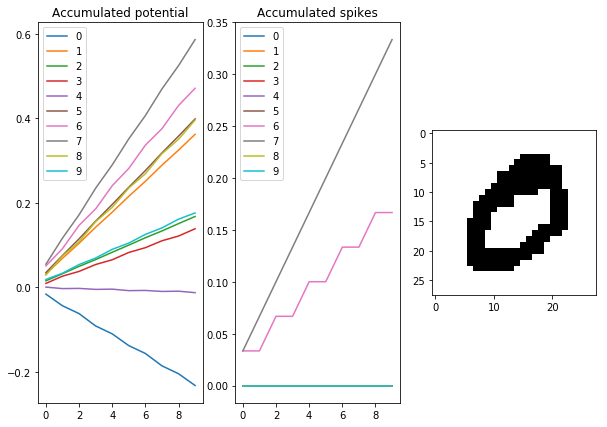

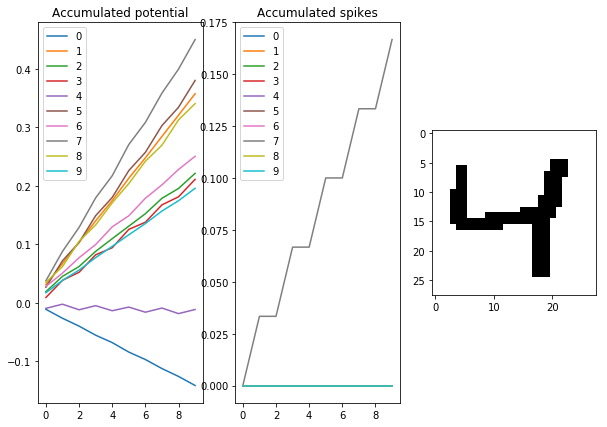

In [44]:
model = LIF_network(T=10)
num_samples = 3
samples = x_train[:num_samples]
model.run(samples)

cumU = np.cumsum(model.out.potential, axis=0)/30.
cumO = np.cumsum(model.out.spikes, axis=0)/30.
idx = np.arange(num_classes)
for i in range(num_samples):
    U = cumU[:, i, :]
    O = cumO[:, i, :]
    #print("True label is", y_train[i])
    plt.figure(i, figsize=(10,7))
    plt.subplot(131)
    plt.plot(U)
    plt.legend(idx)
    plt.title("Accumulated potential")
    plt.subplot(132)
    plt.plot(O)
    plt.legend(idx)
    plt.title("Accumulated spikes")
    plt.subplot(133)
    plt.imshow(np.reshape(ber(samples[i]), (28,28)), cmap=plt.cm.binary)

Full training of the model. Obtained `0.9599` accuracy on the full training set.

In [74]:
solver = Solver(n_epochs=20, batch_size=30)
#model = LIF_network(T=15)
start = time.time()
n_train = 60000
n_test = 1000
solver.train(model, x_train[:n_train], one_hot_train[:n_train], x_test[:n_test], one_hot_test[:n_test])
stop = time.time()
print("training finished after", np.floor((stop-start)/60), "min")

epoch 1 has ended
Loss: 0.08404977076166639
Train Acc.: 0.9526000000000117 Test Acc.: 0.934
epoch 2 has ended
epoch 3 has ended
Loss: 0.077430273221653
Train Acc.: 0.9578166666666793 Test Acc.: 0.942
epoch 4 has ended
epoch 5 has ended
Loss: 0.07283425950287453
Train Acc.: 0.960116666666679 Test Acc.: 0.947
epoch 6 has ended
epoch 7 has ended
Loss: 0.0697265791534412
Train Acc.: 0.9614166666666794 Test Acc.: 0.947
epoch 8 has ended
epoch 9 has ended
Loss: 0.06760789819636734
Train Acc.: 0.9624000000000116 Test Acc.: 0.952
epoch 10 has ended
epoch 11 has ended
Loss: 0.06621370174755056
Train Acc.: 0.9627833333333454 Test Acc.: 0.947
epoch 12 has ended
epoch 13 has ended
Loss: 0.06557314872272185
Train Acc.: 0.9634166666666787 Test Acc.: 0.953
epoch 14 has ended
epoch 15 has ended
Loss: 0.06482227910474612
Train Acc.: 0.9634000000000116 Test Acc.: 0.95
epoch 16 has ended
epoch 17 has ended
Loss: 0.06454610324852043
Train Acc.: 0.9634833333333448 Test Acc.: 0.95
epoch 18 has ended
epoch 1

In [75]:
model.reset()
solver.eval(model, x_test, one_hot_test)

0.9599

In [6]:
model.reset()
n_samp = 3
samples = x_test[2107: 2107 + n_samp]
model.run(samples)

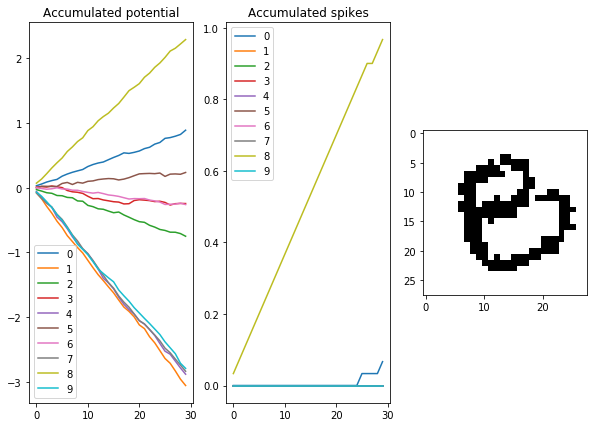

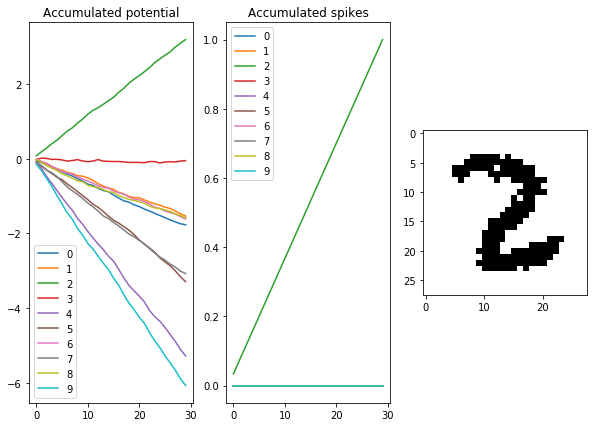

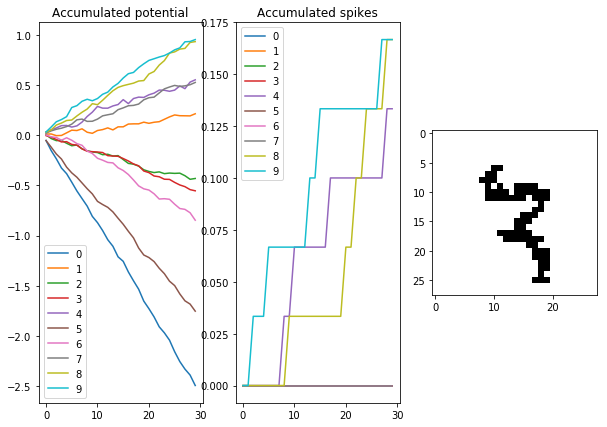

In [9]:
cumU = np.cumsum(model.out.potential, axis=0)/30.
cumO = np.cumsum(model.out.spikes, axis=0)/30.
idx = np.arange(10)
for i in range(n_samp):
    U = cumU[:, i, :]
    O = cumO[:, i, :]
    plt.figure(i, figsize=(10,7))
    plt.subplot(131)
    plt.plot(U)
    plt.legend(idx)
    plt.title("Accumulated potential")
    plt.subplot(132)
    plt.plot(O)
    plt.legend(idx)
    plt.title("Accumulated spikes")
    plt.subplot(133)
    plt.imshow(np.reshape(ber(samples[i]), (28,28)), cmap=plt.cm.binary)

In [78]:
# saving the results
import pickle

with open('bH.obj', 'wb') as bh:
    pickle.dump(model.hidden.bias, bh)
with open('WH.obj', 'wb') as wh:
    pickle.dump(model.hidden.W, wh)
with open('bO.obj', 'wb') as bo:
    pickle.dump(model.out.bias, bo)
with open('WO.obj', 'wb') as wo:
    pickle.dump(model.out.W, wo)

In [3]:
model = LIF_network(T=30)

In [4]:
with open('bH.obj', 'rb') as bh:
    model.hidden.bias = pickle.load(bh)
with open('WH.obj', 'rb') as wh:
    model.hidden.W = pickle.load(wh)
with open('bO.obj', 'rb') as bo:
    model.out.bias = pickle.load(bo)
with open('WO.obj', 'rb') as wo:
    model.out.W = pickle.load(wo)